# Plotting rumen temperature

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("CAAS2065.csv") # read csv of a single animal- ID no 2065

In [3]:
df.head()

,Count,Date,Time,RumenT
0,3897,22-Nov-12,12:31:05,30.56
1,3898,22-Nov-12,12:39:48,30.56
2,3899,22-Nov-12,12:48:50,30.56
3,3900,22-Nov-12,12:57:51,30.56
4,3901,22-Nov-12,13:06:45,30.56


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18940 entries, 0 to 18939
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   18940 non-null  int64  
 1   Date    18940 non-null  object 
 2   Time    18940 non-null  object 
 3   RumenT  18940 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 592.0+ KB


In [5]:
 import datetime

In [9]:
# Converting date to timestamp and set as index
df1 = pd.read_csv("CAAS2065.csv", parse_dates=["Date"], index_col = "Date")

In [10]:
df1.head()

,Count,Time,RumenT
Date,,,
2012-11-22,3897,12:31:05,30.56
2012-11-22,3898,12:39:48,30.56
2012-11-22,3899,12:48:50,30.56
2012-11-22,3900,12:57:51,30.56
2012-11-22,3901,13:06:45,30.56


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18940 entries, 2012-11-22 to 2013-04-14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   18940 non-null  int64  
 1   Time    18940 non-null  object 
 2   RumenT  18940 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 591.9+ KB


In [13]:
df1.index

DatetimeIndex(['2012-11-22', '2012-11-22', '2012-11-22', '2012-11-22',
               '2012-11-22', '2012-11-22', '2012-11-22', '2012-11-22',
               '2012-11-22', '2012-11-22',
               ...
               '2013-04-14', '2013-04-14', '2013-04-14', '2013-04-14',
               '2013-04-14', '2013-04-14', '2013-04-14', '2013-04-14',
               '2013-04-14', '2013-04-14'],
              dtype='datetime64[ns]', name='Date', length=18940, freq=None)

In [15]:
df1.loc['2012-11-22'] # access to particualr date

,Count,Time,RumenT
Date,,,
2012-11-22,3897,12:31:05,30.56
2012-11-22,3898,12:39:48,30.56
2012-11-22,3899,12:48:50,30.56
2012-11-22,3900,12:57:51,30.56
2012-11-22,3901,13:06:45,30.56
...,...,...,...
2012-11-22,3967,23:17:09,40.56
2012-11-22,3968,23:26:32,40.56
2012-11-22,3969,23:35:54,40.56


In [16]:
df1.loc['2012-11-22'].RumenT.mean() # mean rumen temperature on 22 Nov 2012

37.399999999999956

In [17]:
df1.RumenT.resample("M").mean() # monthly mean rumen temperature 

Date
2012-11-30    39.945150
2012-12-31    39.993373
2013-01-31    40.406170
2013-02-28    40.043110
2013-03-31    40.218364
2013-04-30    40.403041
Freq: M, Name: RumenT, dtype: float64

In [18]:
df1.loc['2012-11-22'].RumenT.mean().plot() # trying to plot rumen temperature of a particular date but....!!

AttributeError: 'float' object has no attribute 'plot'

<AxesSubplot:xlabel='Date'>

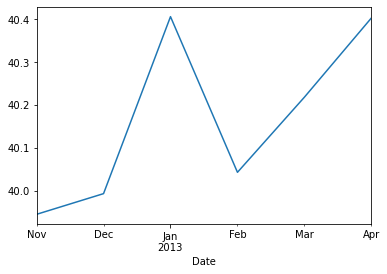

In [19]:
df1.RumenT.resample("M").mean().plot() # Its a monthly mean rumen temp but I dont want that!

<AxesSubplot:xlabel='Date'>

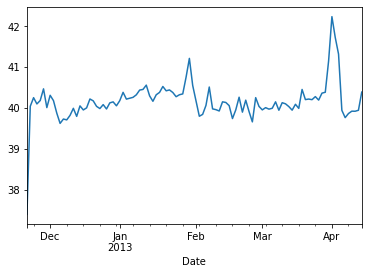

In [20]:
df1.RumenT.resample("B").mean().plot() # Its a daily mean rumen temperature accross the period but I am not looking for this

# converting hourly mean rumen temperature from minute intervals

In [34]:
df2 = pd.read_csv('CAAS2065.csv') 

In [35]:
df2['timestamp'] = pd.to_datetime(df2['Date'])


In [24]:
# convert hourly mean from minute interval 
hourly_data = df2.resample('1H', on='timestamp').mean()


In [25]:
#save the new csv file containing hourly mean
hourly_data.to_csv('hourly_temperature_data.csv')

In [26]:
#read the new csv file
dfh = pd.read_csv('hourly_temperature_data.csv')

In [27]:
dfh.head() # looks it coverted to hourly mean but it shows only the mean of first hour but for the rest hour its shows NaN values!!

,timestamp,Count,RumenT
0,2012-11-22 00:00:00,3934.0,37.4
1,2012-11-22 01:00:00,NaN,NaN
2,2012-11-22 02:00:00,NaN,NaN
3,2012-11-22 03:00:00,NaN,NaN
4,2012-11-22 04:00:00,NaN,NaN


In [29]:
dfh.head(50) # Why it shows NaN values for rest of the hours?

,timestamp,Count,RumenT
0,2012-11-22 00:00:00,3934.000000,37.400000
1,2012-11-22 01:00:00,NaN,NaN
2,2012-11-22 02:00:00,NaN,NaN
3,2012-11-22 03:00:00,NaN,NaN
4,2012-11-22 04:00:00,NaN,NaN
5,2012-11-22 05:00:00,NaN,NaN
6,2012-11-22 06:00:00,NaN,NaN
7,2012-11-22 07:00:00,NaN,NaN
8,2012-11-22 08:00:00,NaN,NaN
9,2012-11-22 09:00:00,NaN,NaN


In [37]:
#another try to plot rumen temperature for a particular date
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV file into a Pandas DataFrame
df = pd.read_csv('CAAS2067.csv')

# convert the timestamp column to a datetime object and set it as the index
df = pd.read_csv("CAAS2067.csv", parse_dates=["Date"], index_col = "Date")



In [38]:
df.index

DatetimeIndex(['2012-11-22', '2012-11-22', '2012-11-22', '2012-11-22',
               '2012-11-22', '2012-11-22', '2012-11-22', '2012-11-22',
               '2012-11-22', '2012-11-22',
               ...
               '2013-04-14', '2013-04-14', '2013-04-14', '2013-04-14',
               '2013-04-14', '2013-04-14', '2013-04-14', '2013-04-14',
               '2013-04-14', '2013-04-14'],
              dtype='datetime64[ns]', name='Date', length=21039, freq=None)

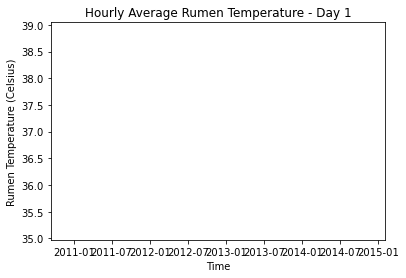

In [44]:
# resample the data to hourly intervals and calculate the mean temperature for each hour
hourly_temps = df.RumenT.resample('H').mean()

# select the data for day 5 and plot it
day1_temps = hourly_temps.loc['2012-11-22']
plt.plot(day1_temps)
plt.title('Hourly Average Rumen Temperature - Day 1')
plt.xlabel('Time')
plt.ylabel('Rumen Temperature (Celsius)')
plt.show()
# its empty!!

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the CSV file into a Pandas DataFrame
df4 = pd.read_csv('CAAS2067.csv')

# convert the timestamp column to a datetime object and set it as the index
df4 = pd.read_csv("CAAS2067.csv", parse_dates=["Date"], index_col = "Date")



In [49]:
df4.index

DatetimeIndex(['2012-11-22', '2012-11-22', '2012-11-22', '2012-11-22',
               '2012-11-22', '2012-11-22', '2012-11-22', '2012-11-22',
               '2012-11-22', '2012-11-22',
               ...
               '2013-04-14', '2013-04-14', '2013-04-14', '2013-04-14',
               '2013-04-14', '2013-04-14', '2013-04-14', '2013-04-14',
               '2013-04-14', '2013-04-14'],
              dtype='datetime64[ns]', name='Date', length=21039, freq=None)

C:\Users\mrah7296\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


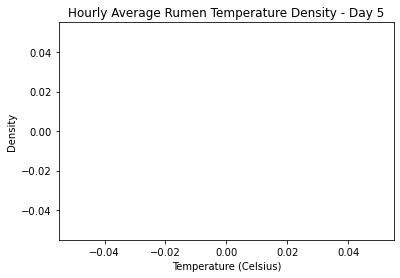

In [54]:
# resample the data to hourly intervals and calculate the mean temperature for each hour
hourly_temps = df4.RumenT.resample('H').mean()

# select the data for day 5 and create a density plot
day5_temps = hourly_temps.loc['2012-11-22']
sns.kdeplot(day5_temps, shade=True)
plt.title('Hourly Average Rumen Temperature Density - Day 5')
plt.xlabel('Temperature (Celsius)')
plt.show()

# Hourly series from minute series

In [55]:
import os

In [56]:
#working with multiple files at time
input_dir="C:/PhD/Data/cbt" #creating new working directory

In [57]:
#change directory containing all files in a list
os.chdir(input_dir)
for filename in os.listdir():
    if filename.endswith(".csv"):
        print(filename)

CAAS2072.csv
CAAS2073.csv


In [60]:
#convert Date objet to Datetime index
os.chdir(input_dir)
for filename in os.listdir():
    if filename.endswith(".csv"):
        df=pd.read_csv(filename, index_col=['Date'], parse_dates = ['Date'])
        print(df)

            Count      Time  RumenT
Date                               
2012-11-22   3925  12:39:54   39.56
2012-11-22   3926  12:49:04   41.56
2012-11-22   3927  12:58:15   37.56
2012-11-22   3928  13:07:25   35.56
2012-11-22   3929  13:16:36   33.56
...           ...       ...     ...
2013-04-14  25873  11:57:13   40.00
2013-04-14  25874  12:05:52   40.22
2013-04-14  25875  12:15:16   40.22
2013-04-14  25876  12:23:36   40.22
2013-04-14  25877  12:34:05   40.22

[20284 rows x 3 columns]
            Count      Time  RumenT
Date                               
2012-11-22   3912  13:11:27   30.56
2012-11-22   3913  13:20:28   30.56
2012-11-22   3914  13:29:19   30.56
2012-11-22   3915  13:38:17   30.56
2012-11-22   3916  13:47:15   30.56
...           ...       ...     ...
2013-04-14  25692   6:16:51   44.72
2013-04-14  25693   6:28:57   30.56
2013-04-14  25694   6:41:02   44.72
2013-04-14  25695   6:53:08   44.72
2013-04-14  25696   7:05:13   44.72

[20761 rows x 3 columns]


In [61]:
#convert minutes intervel to hourly mean
os.chdir(input_dir)
for filename in os.listdir():
    if filename.endswith(".csv"):
        df=pd.read_csv(filename, index_col=['Date'], parse_dates = ['Date'])
        data_df = df.resample("H").mean()
        print(data_df)

                            Count     RumenT
Date                                        
2012-11-22 00:00:00   3961.500000  37.127568
2012-11-22 01:00:00           NaN        NaN
2012-11-22 02:00:00           NaN        NaN
2012-11-22 03:00:00           NaN        NaN
2012-11-22 04:00:00           NaN        NaN
...                           ...        ...
2013-04-13 20:00:00           NaN        NaN
2013-04-13 21:00:00           NaN        NaN
2013-04-13 22:00:00           NaN        NaN
2013-04-13 23:00:00           NaN        NaN
2013-04-14 00:00:00  25838.584416  39.510649

[3433 rows x 2 columns]
                            Count     RumenT
Date                                        
2012-11-22 00:00:00   3945.151515  37.847879
2012-11-22 01:00:00           NaN        NaN
2012-11-22 02:00:00           NaN        NaN
2012-11-22 03:00:00           NaN        NaN
2012-11-22 04:00:00           NaN        NaN
...                           ...        ...
2013-04-13 20:00:00           

In [62]:
#create new directory to save the coverted file
path ="C:/PhD/Data/downloads"
output_dir = os.path.join(path,'hourly_rumen_temp')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [64]:
os.chdir(input_dir)
for filename in os.listdir():
    if filename.endswith(".csv"):
        file_name, file_ext = os.path.splitext(filename)
        new_name = "{} {} {}".format(file_name, '_hourly', file_ext)
        df=pd.read_csv(filename, index_col=['Date'], parse_dates = ['Date'])
        data_df = df.resample("H").mean()
        print(data_df)
        data_df.to_csv(os.path.join(output_dir,new_name), index=True)
print("Conversion has been done successfully!")

                            Count     RumenT
Date                                        
2012-11-22 00:00:00   3961.500000  37.127568
2012-11-22 01:00:00           NaN        NaN
2012-11-22 02:00:00           NaN        NaN
2012-11-22 03:00:00           NaN        NaN
2012-11-22 04:00:00           NaN        NaN
...                           ...        ...
2013-04-13 20:00:00           NaN        NaN
2013-04-13 21:00:00           NaN        NaN
2013-04-13 22:00:00           NaN        NaN
2013-04-13 23:00:00           NaN        NaN
2013-04-14 00:00:00  25838.584416  39.510649

[3433 rows x 2 columns]
                            Count     RumenT
Date                                        
2012-11-22 00:00:00   3945.151515  37.847879
2012-11-22 01:00:00           NaN        NaN
2012-11-22 02:00:00           NaN        NaN
2012-11-22 03:00:00           NaN        NaN
2012-11-22 04:00:00           NaN        NaN
...                           ...        ...
2013-04-13 20:00:00           

                            Count     RumenT
Date                                        
2012-11-22 00:00:00   3961.500000  37.127568
2012-11-22 01:00:00           NaN        NaN
2012-11-22 02:00:00           NaN        NaN
2012-11-22 03:00:00           NaN        NaN
2012-11-22 04:00:00           NaN        NaN
...                           ...        ...
2013-04-13 20:00:00           NaN        NaN
2013-04-13 21:00:00           NaN        NaN
2013-04-13 22:00:00           NaN        NaN
2013-04-13 23:00:00           NaN        NaN
2013-04-14 00:00:00  25838.584416  39.510649

[3433 rows x 2 columns]
Plotting rumen temperature


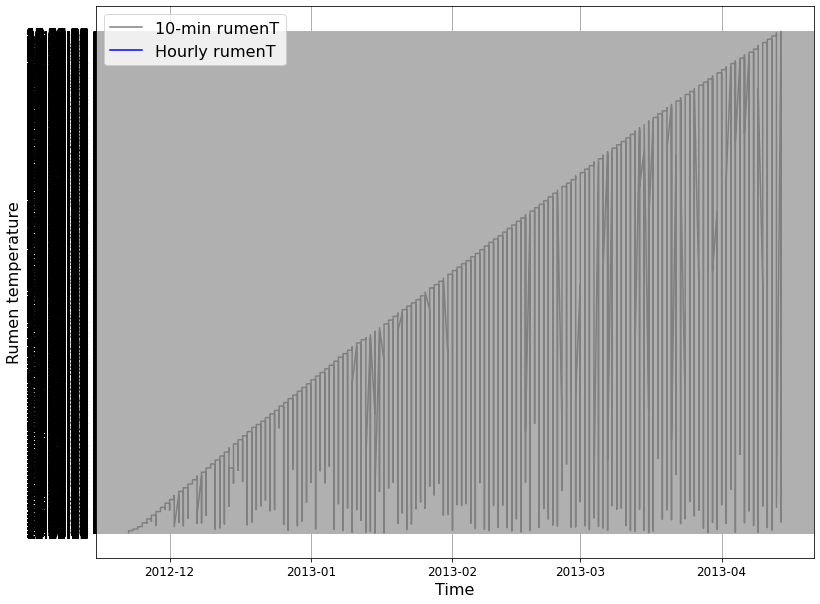

                            Count     RumenT
Date                                        
2012-11-22 00:00:00   3945.151515  37.847879
2012-11-22 01:00:00           NaN        NaN
2012-11-22 02:00:00           NaN        NaN
2012-11-22 03:00:00           NaN        NaN
2012-11-22 04:00:00           NaN        NaN
...                           ...        ...
2013-04-13 20:00:00           NaN        NaN
2013-04-13 21:00:00           NaN        NaN
2013-04-13 22:00:00           NaN        NaN
2013-04-13 23:00:00           NaN        NaN
2013-04-14 00:00:00  25679.545455  37.001212

[3433 rows x 2 columns]
Plotting rumen temperature


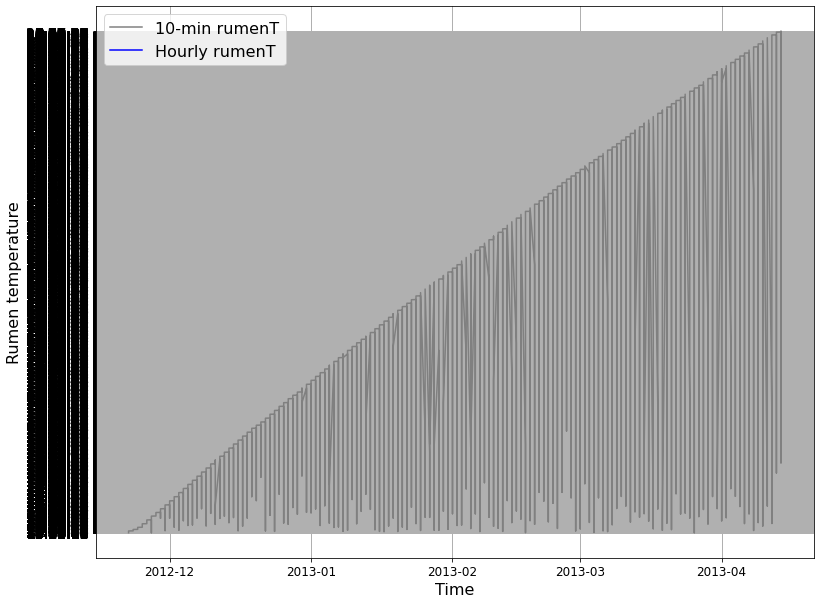

Conversion has been done successfully!


In [67]:
# trying to plot two animal's rumen temp data at the same plot but the result is horrible!!!
%matplotlib inline
os.chdir(input_dir)
for filename in os.listdir():
    if filename.endswith(".csv"):
        file_name, file_ext = os.path.splitext(filename)
        new_name = "{} {} {}".format(file_name, '_hourly', file_ext)
        df=pd.read_csv(filename, index_col=['Date'], parse_dates = ['Date'])
        data_df = df.resample("H").mean()
        print(data_df)
        data_df.to_csv(os.path.join(output_dir,new_name), index=True)
        ############################################################
        print("Plotting rumen temperature")
        fig, ax = plt.subplots(figsize = (11.50, 8.50))
        plt.grid(linestyle='-',linewidth=1.0)
        ax.plot(df.index, df["{}".format(df.columns[1])], color="grey")
        ax.plot(data_df.index, data_df["{}".format(data_df.columns[1])], color="blue")
        ax.legend(['10-min rumenT', "Hourly rumenT"], ncol=1, fontsize = 16)
        ax.set_xlabel("Time", fontsize = 16)
        ax.set_ylabel("Rumen temperature", fontsize = 16)
        ax.xaxis.set_tick_params(labelsize = 12)
        ax.yaxis.set_tick_params(labelsize = 14)
    
        fig.tight_layout()
        plt.show(block=False)
        plt.pause(3)
        plt.close()
print("Conversion has been done successfully!")